<a href="https://colab.research.google.com/github/worejeongglenogang/2025-1-myclass-BDA/blob/main/inclass/swimmingpooltitanic_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install koreanize_matplotlib


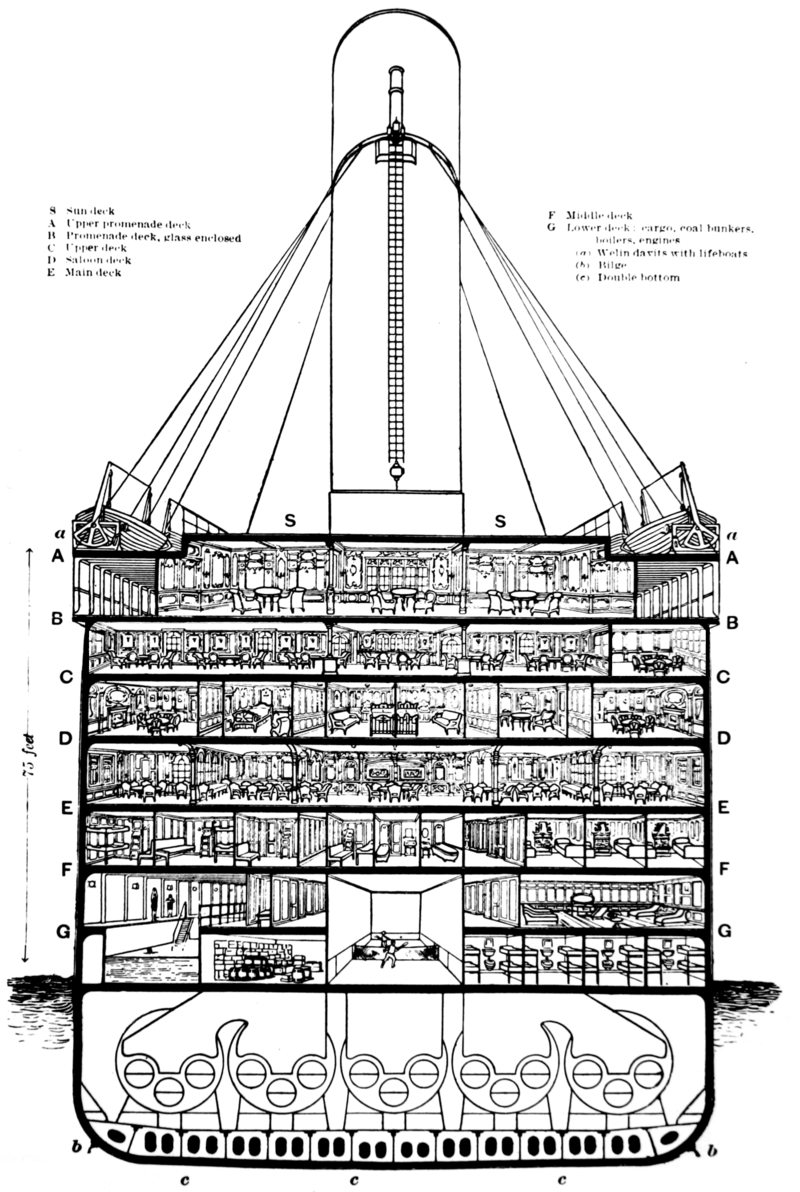

Saving titanic1309.csv to titanic1309 (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


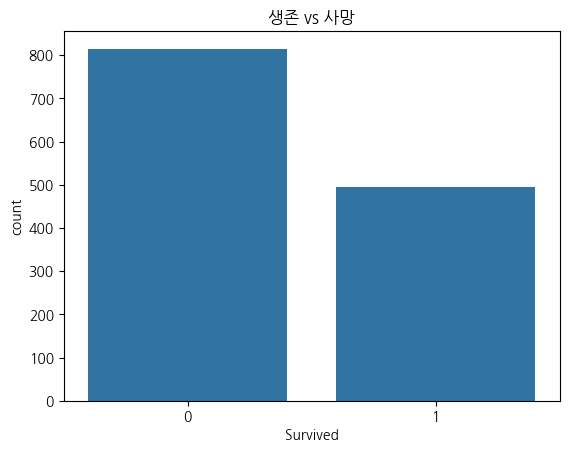

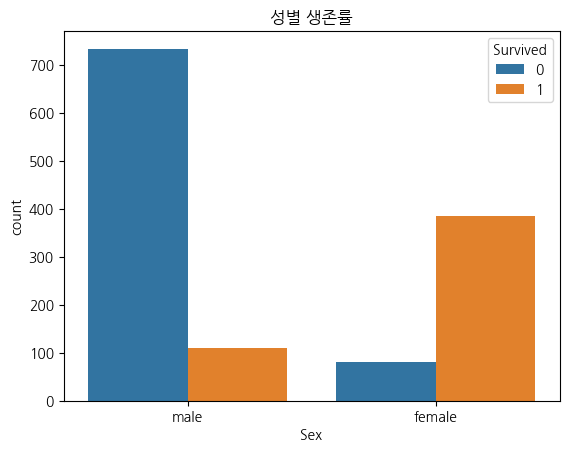

<ipython-input-10-89df1f3992ae>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('age_group')['Survived'].mean().reset_index()


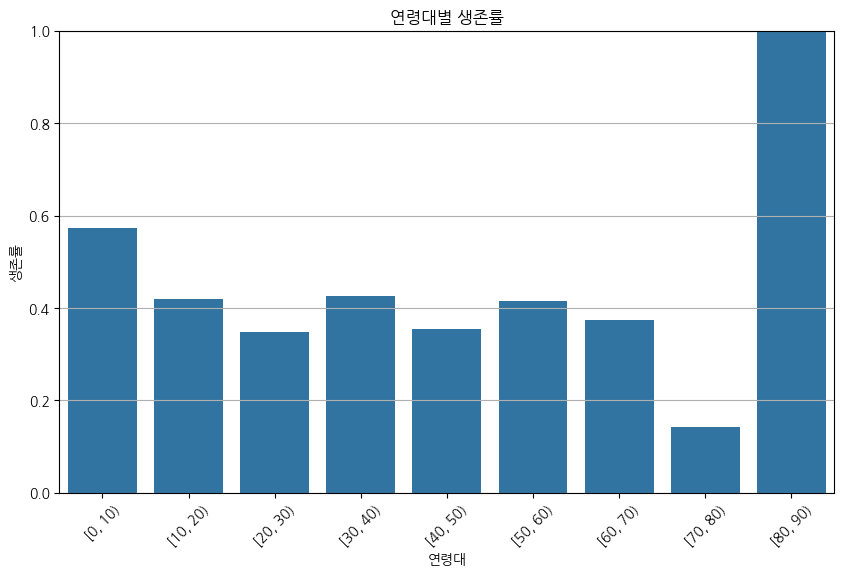

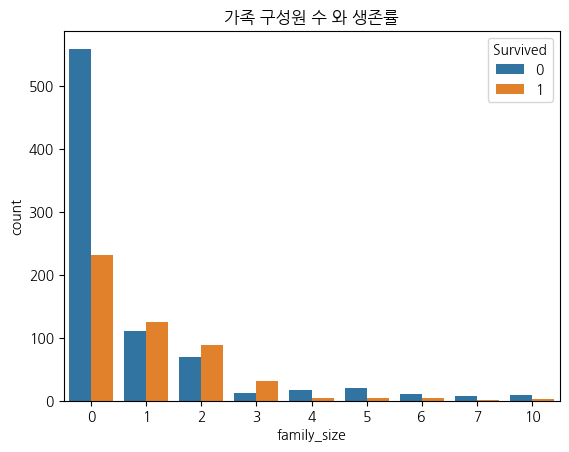

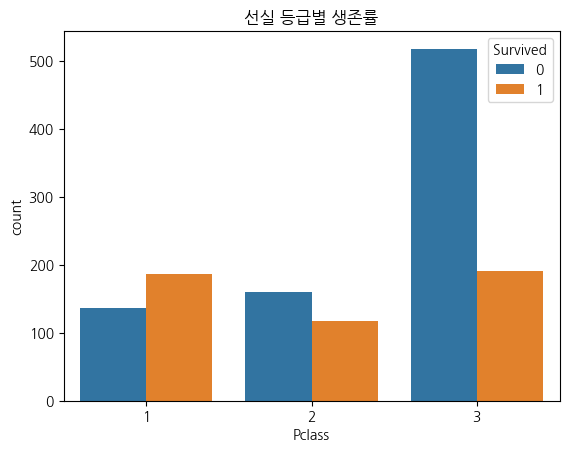

In [10]:
# Step 1: 기본 셋업
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


# 시각화 한글 깨짐 방지 (코랩용)
import matplotlib
matplotlib.rc('font', family='NanumGothic')

# Step 0: 타이타닉 단면도 이미지 표시
from IPython.display import Image, display

# 파일 경로에 맞게 이미지 불러오기
display(Image('/mnt/tat.png'))


# Step 2: 파일 직접 업로드
from google.colab import files
uploaded = files.upload()

# 업로드한 파일명을 변수로 받아서 불러오기 (예: titanic1309.csv)
df = pd.read_csv('titanic1309.csv')  # 파일 이름 정확히 입력
df.head()

# Step 3: 데이터 구조 확인
df.info()
df.describe(include='all')
df.isnull().sum()

# Step 4: 변수별 EDA (탐색적 분석)
sns.countplot(x='Survived', data=df)
plt.title('생존 vs 사망')
plt.show()



sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('성별 생존률')
plt.show()
# 연령대를 10살 간격으로 나누기
df['age_group'] = pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80,90], right=False)

# 연령대별 생존률 계산
age_survival = df.groupby('age_group')['Survived'].mean().reset_index()

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='Survived', data=age_survival)
plt.title('연령대별 생존률')
plt.ylabel('생존률')
plt.xlabel('연령대')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
df['family_size'] = df['SibSp'] + df['Parch']

sns.countplot(x='family_size', hue='Survived', data=df)
plt.title('가족 구성원 수 와 생존률')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('선실 등급별 생존률')
plt.show()

# Step 4: 변수별 EDA 중 나이 분석 부분을 수정













# Step 5: 결측값 처리
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])